In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [176]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
patient_data_df = pd.read_csv('https://raw.githubusercontent.com/niteen11/CUNY_DATA_698/master/dataset_diabetes/diabetic_data.csv')

In [4]:
patient_data_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
patient_data_df.shape

(101766, 50)

In [6]:
patient_data_df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [7]:
patient_data_df.groupby('gender').size()

gender
Female             54708
Male               47055
Unknown/Invalid        3
dtype: int64

In [8]:
import dexplot as dxp

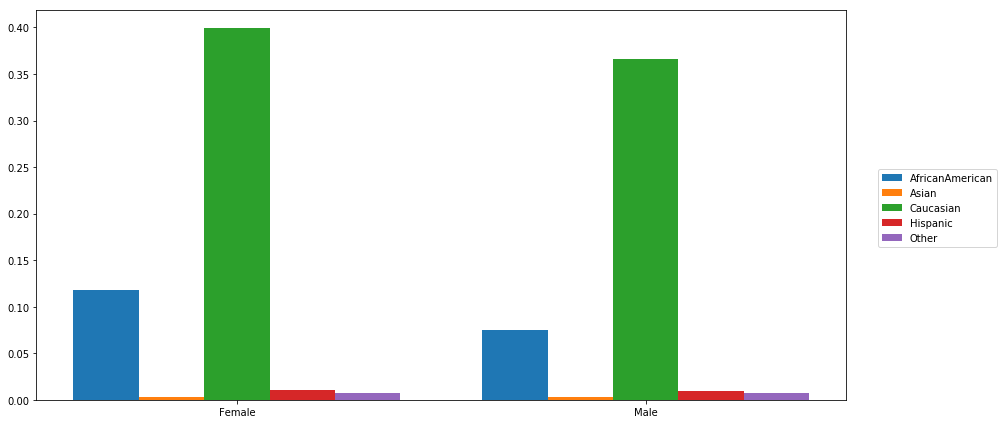

In [173]:
dxp.aggplot(agg='gender', data=patient_data_df[(patient_data_df['race']!='?') & (patient_data_df['gender']!='Unknown/Invalid')], hue='race', normalize='all')

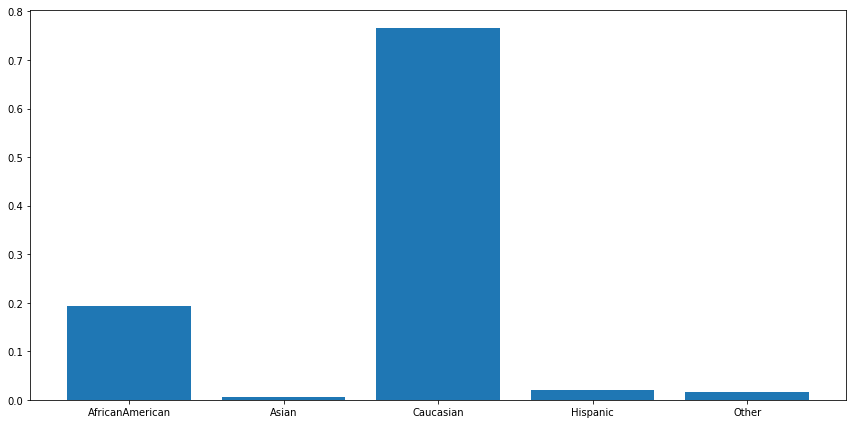

In [88]:
dxp.aggplot(agg='race', data=patient_data_df[(patient_data_df['race']!='?') & (patient_data_df['gender']!='Unknown/Invalid')], normalize='all')

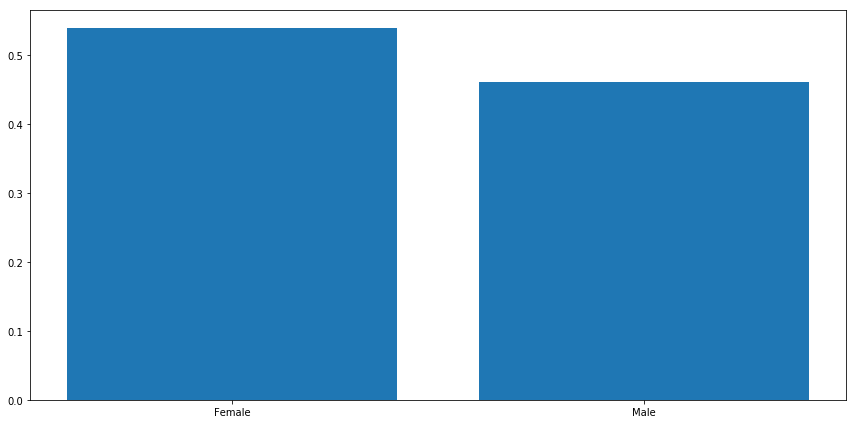

In [89]:
dxp.aggplot(agg='gender', data=patient_data_df[(patient_data_df['race']!='?') & (patient_data_df['gender']!='Unknown/Invalid')], normalize='all')

(<Figure size 720x720 with 3 Axes>,)

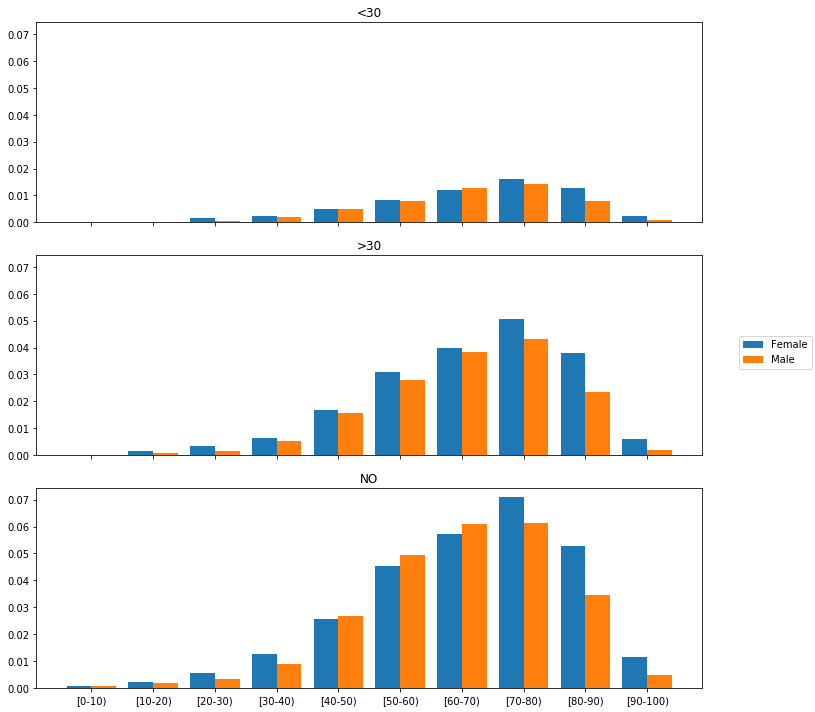

In [175]:
dxp.aggplot(agg='age', data=patient_data_df[(patient_data_df['race']!='?') & (patient_data_df['gender']!='Unknown/Invalid')], hue='gender', normalize='all', row='readmitted', wrap=3)

(<Figure size 720x720 with 3 Axes>,)

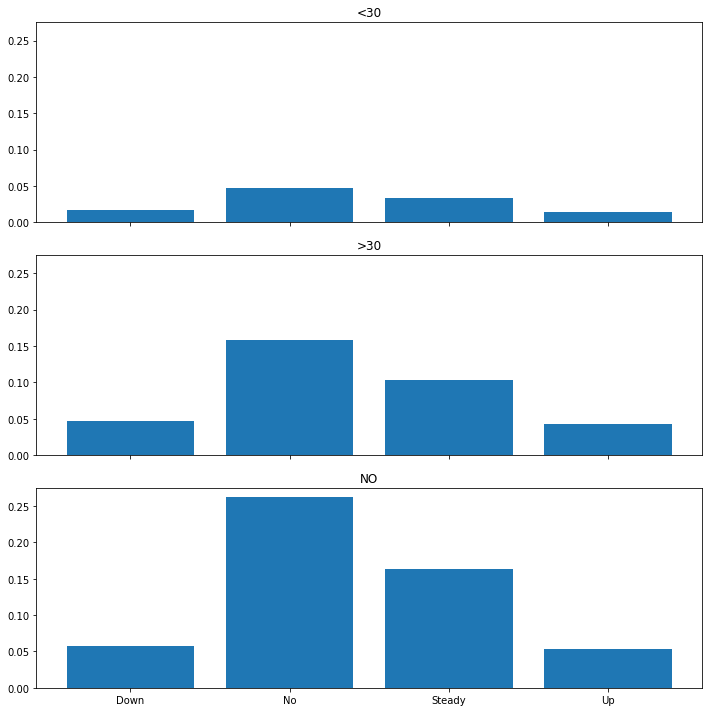

In [191]:
dxp.aggplot(agg='insulin', data=patient_data_df[(patient_data_df['race']!='?') & (patient_data_df['gender']!='Unknown/Invalid')], row='readmitted', wrap=3, normalize='all')

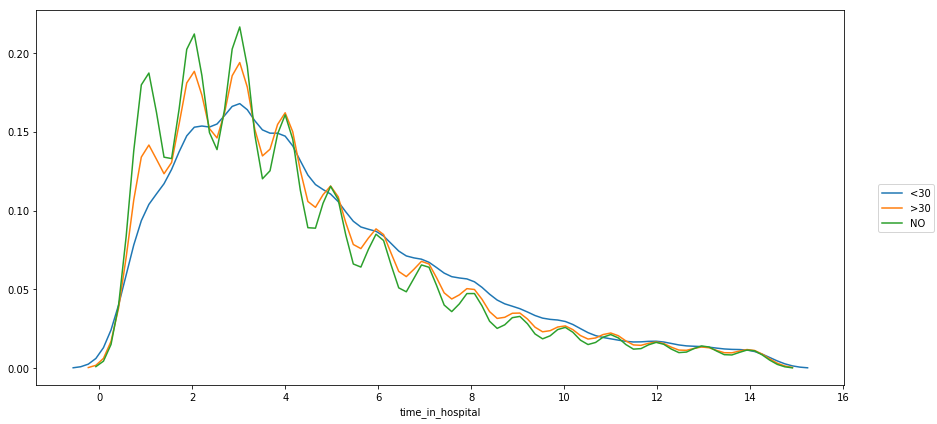

In [104]:
dxp.aggplot(agg='time_in_hospital', data=patient_data_df, groupby='readmitted',  kind='kde')

(<Figure size 720x720 with 3 Axes>,)

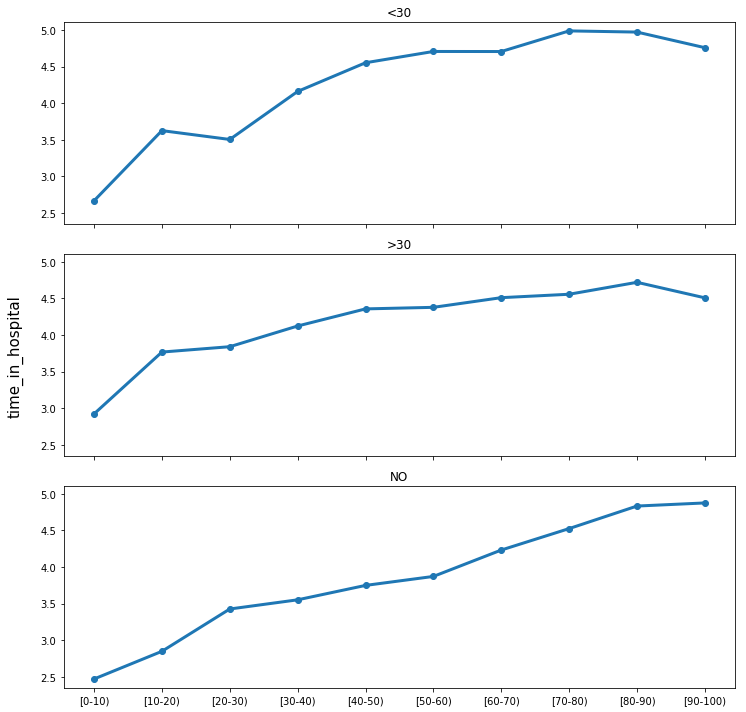

In [111]:
dxp.aggplot(agg='time_in_hospital', data=patient_data_df, groupby='age',kind='line', normalize='all', row='readmitted')

(<Figure size 720x720 with 3 Axes>,)

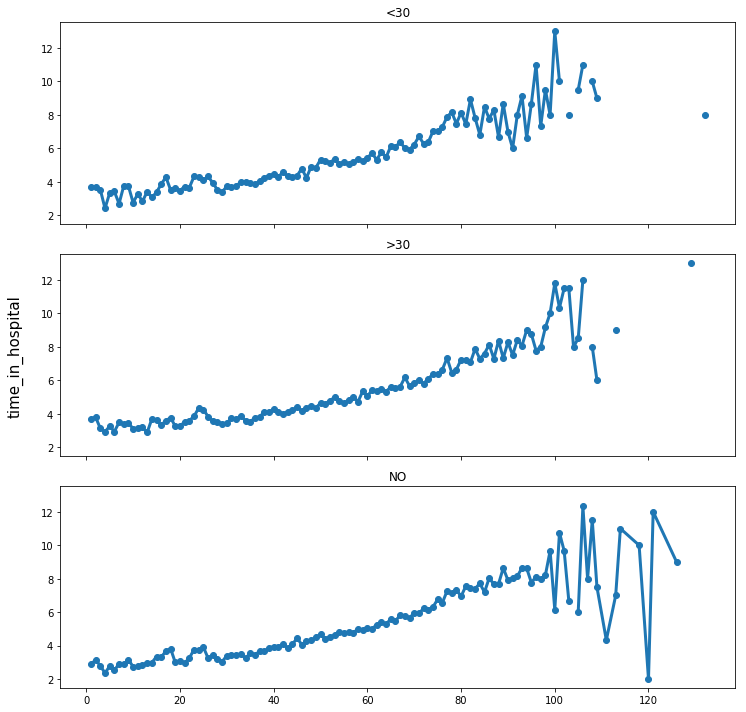

In [149]:
dxp.aggplot(agg='time_in_hospital', data=patient_data_df, groupby=('num_lab_procedures'),kind='line', row='readmitted', wrap=3)

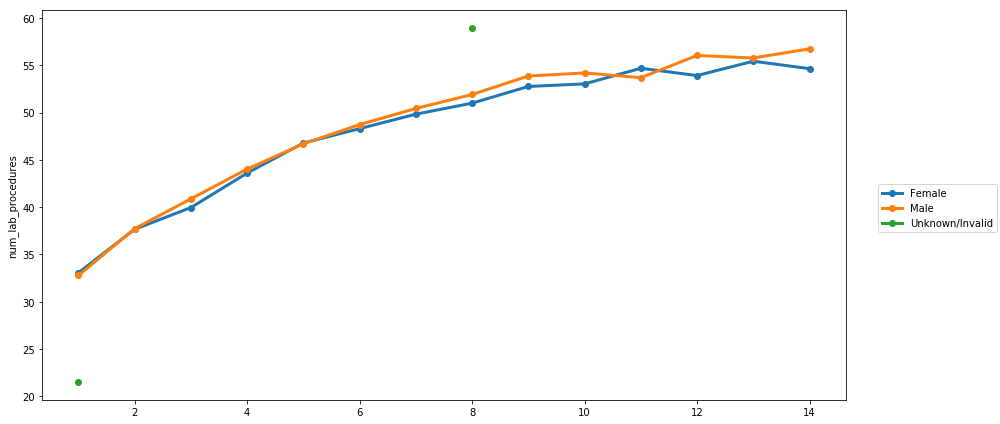

In [188]:
# fig, ax= plt.subplots(figsize=(15,10), ncols=2, nrows=1)
dxp.aggplot(agg='num_lab_procedures', data=patient_data_df, groupby='time_in_hospital', hue='gender', kind='line', aggfunc='mean', orient='v')

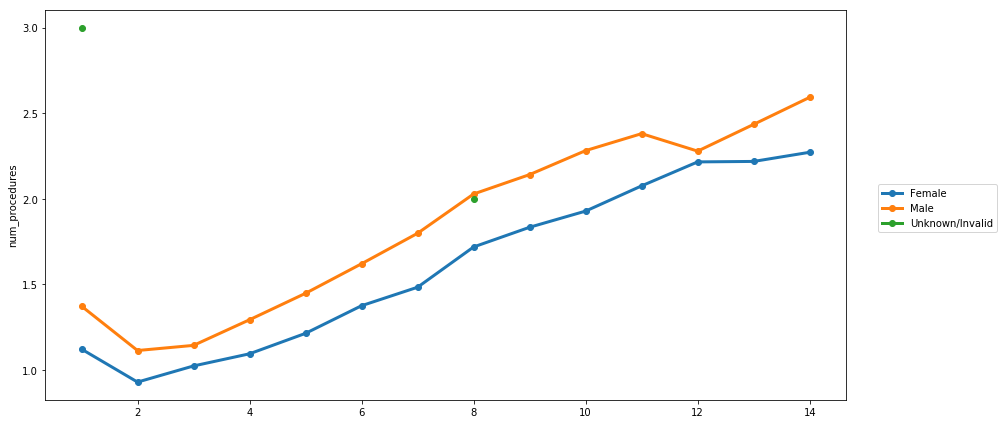

In [189]:
dxp.aggplot(agg='num_procedures', data=patient_data_df, groupby='time_in_hospital', hue='gender', kind='line', aggfunc='mean', orient='v', normalize='all')

(<Figure size 720x720 with 3 Axes>,)

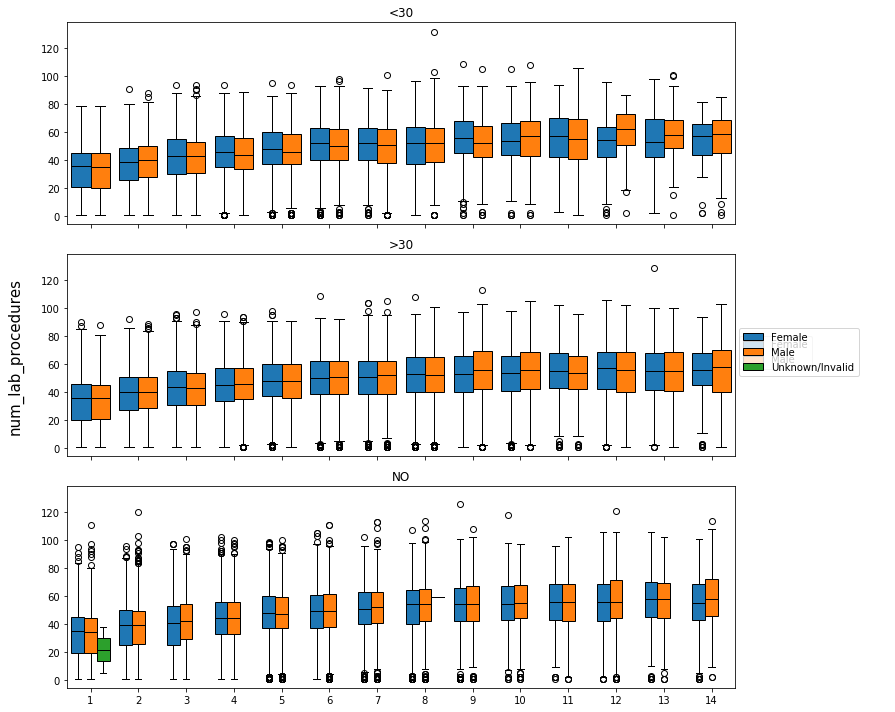

In [192]:
dxp.aggplot(agg='num_lab_procedures', data=patient_data_df, groupby='time_in_hospital', kind='box', orient='v', hue='gender',row='readmitted', wrap=3)

(<Figure size 720x720 with 3 Axes>,)

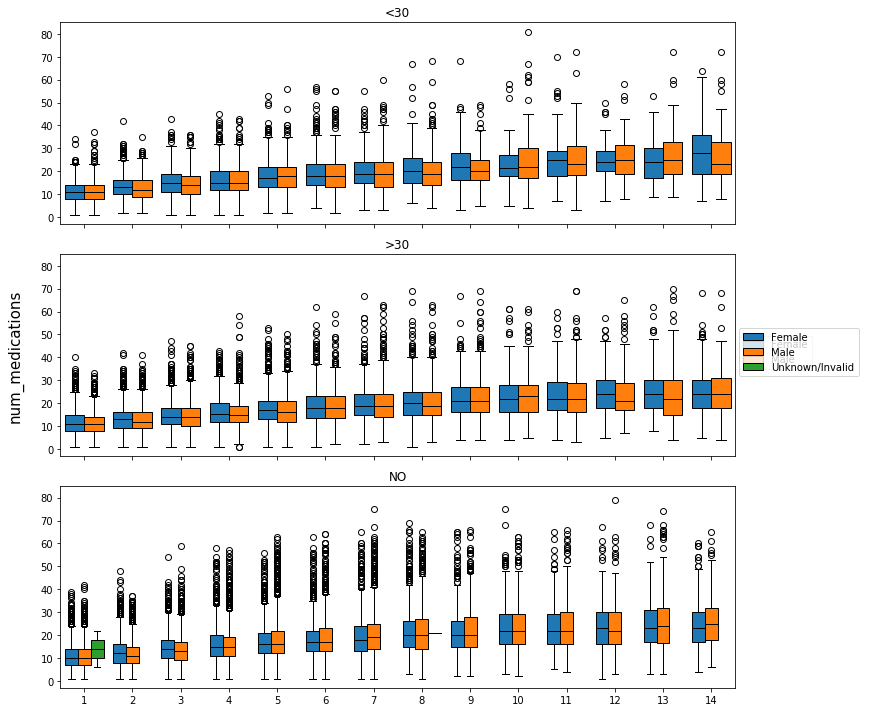

In [193]:
dxp.aggplot(agg='num_medications', data=patient_data_df, groupby='time_in_hospital', kind='box', orient='v', hue='gender',row='readmitted', wrap=3)

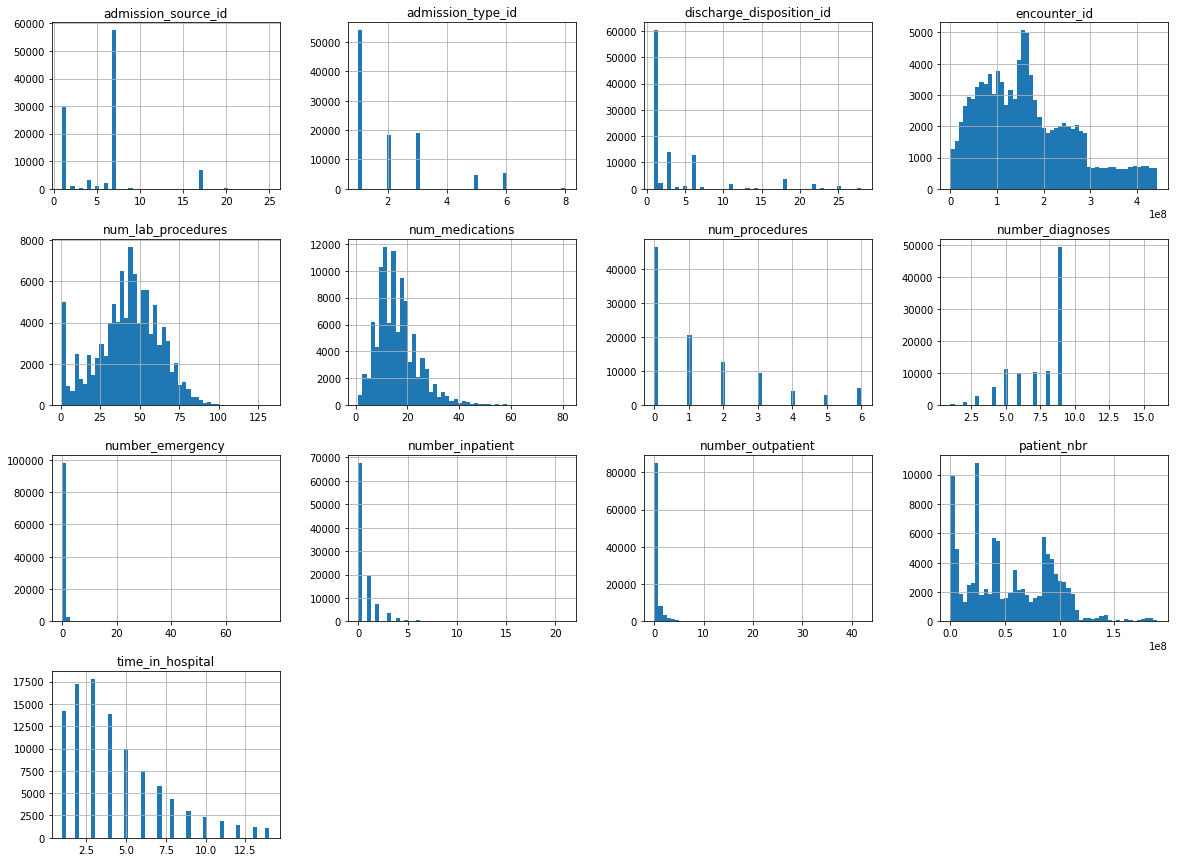

In [190]:
patient_data_df.hist(bins=50, figsize=(20,15))
plt.show()

(<Figure size 720x720 with 3 Axes>,)

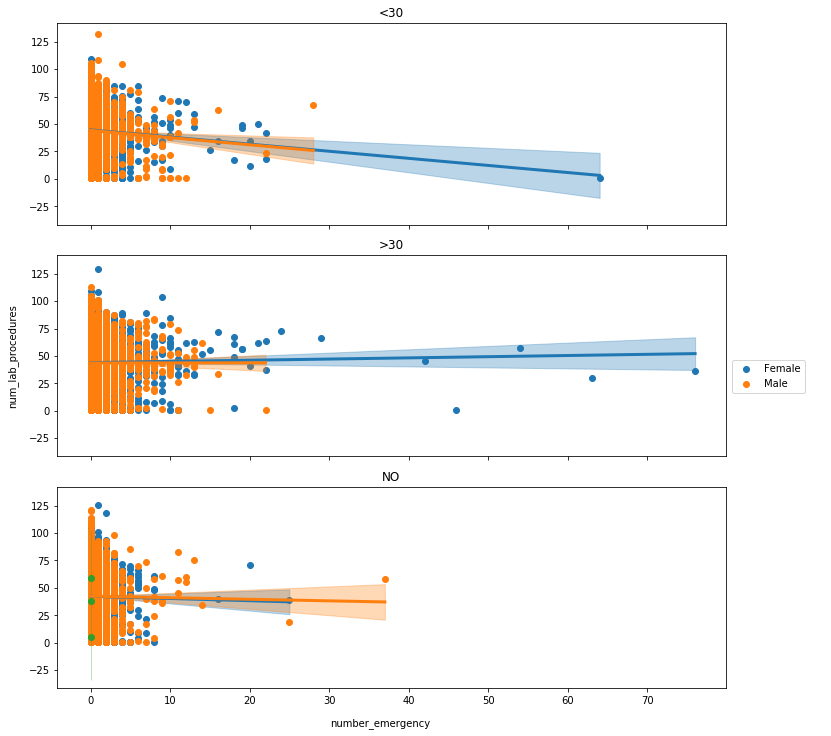

In [120]:
dxp.jointplot('number_emergency', 'num_lab_procedures', data=patient_data_df, hue='gender', row='readmitted', wrap=3, fit_reg=True)

(<Figure size 720x576 with 2 Axes>,)

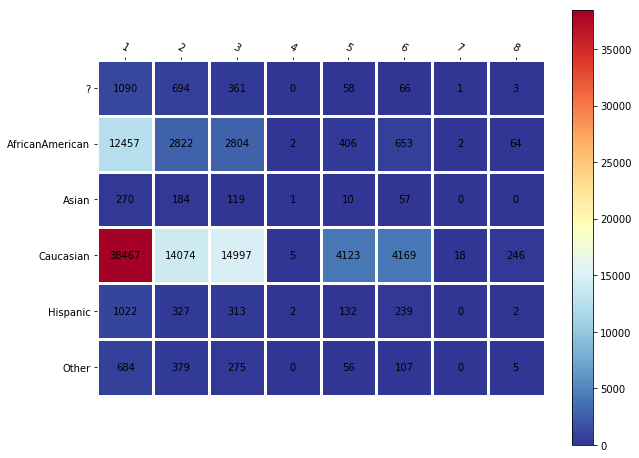

In [144]:
dxp.heatmap(x='admission_type_id', y='race', data=patient_data_df, annot=True, fmt='.0f')

(<Figure size 1152x1152 with 2 Axes>,)

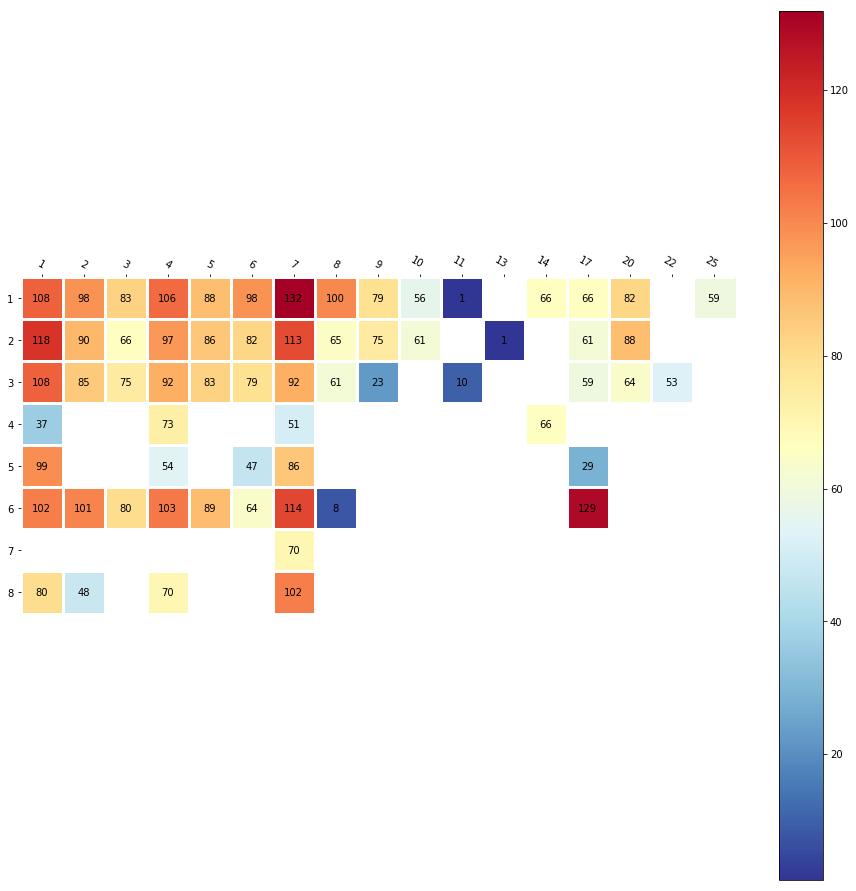

In [142]:
dxp.heatmap(x='admission_source_id', y='admission_type_id', agg='num_lab_procedures', aggfunc='max', 
            data=patient_data_df, annot=True, fmt='.0f',figsize=(16, 16))

(<Figure size 1152x1152 with 2 Axes>,)

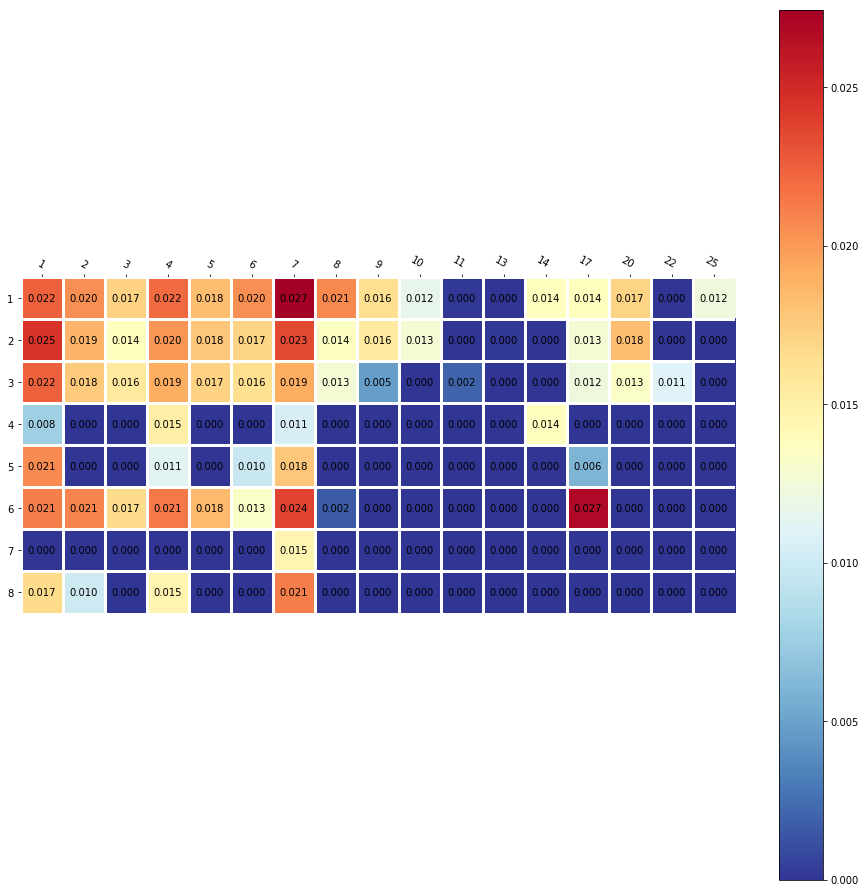

In [140]:
dxp.heatmap(x='admission_source_id', y='admission_type_id', agg='num_lab_procedures', aggfunc='max', data=patient_data_df, annot=True, fmt='.3f',
           normalize='all' ,figsize=(16, 16))

(<Figure size 720x720 with 2 Axes>,)

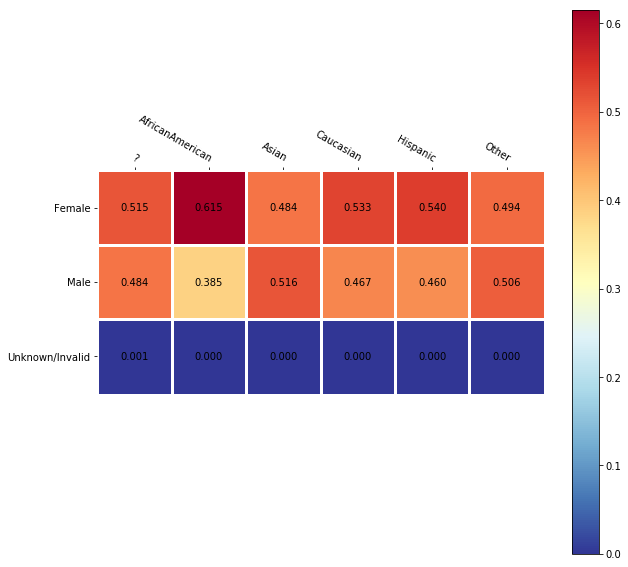

In [138]:
dxp.heatmap(x='race', y='gender', agg='time_in_hospital', aggfunc='sum', 
            data=patient_data_df, annot=True, fmt='.3f', normalize='race',figsize=(10, 10))

(<Figure size 1152x1152 with 2 Axes>,)

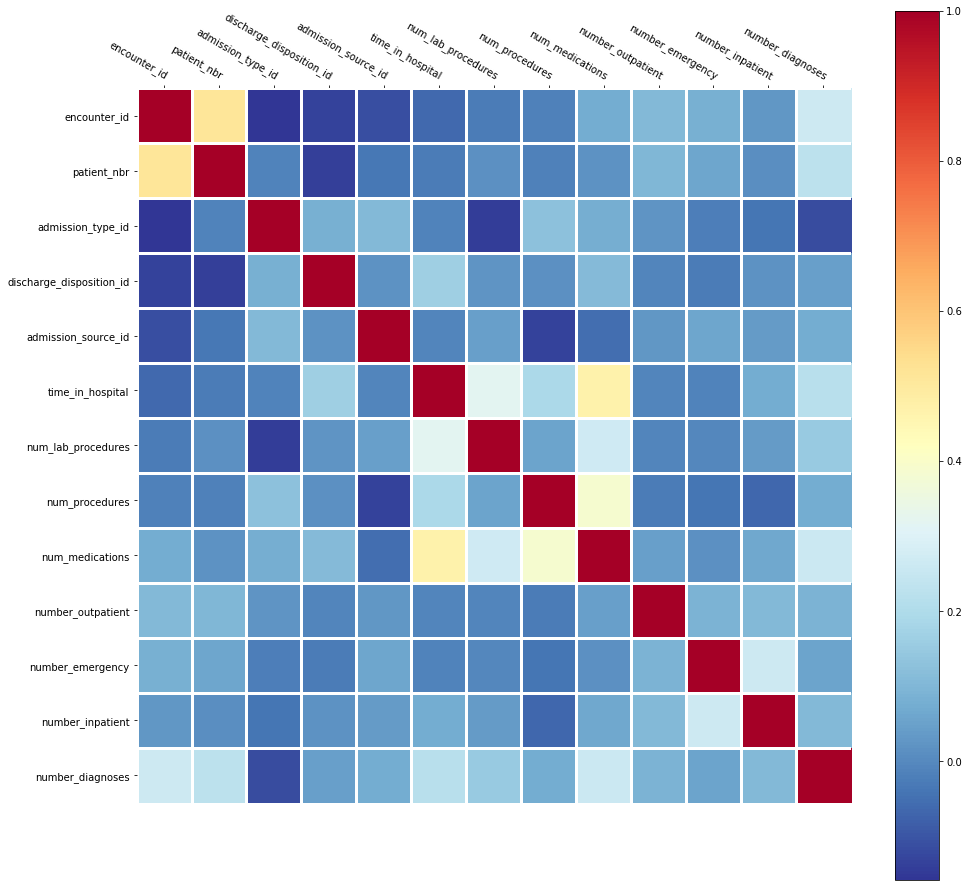

In [135]:
dxp.heatmap(data=patient_data_df, corr=True, figsize=(16, 16))

ValueError: bottom cannot be >= top

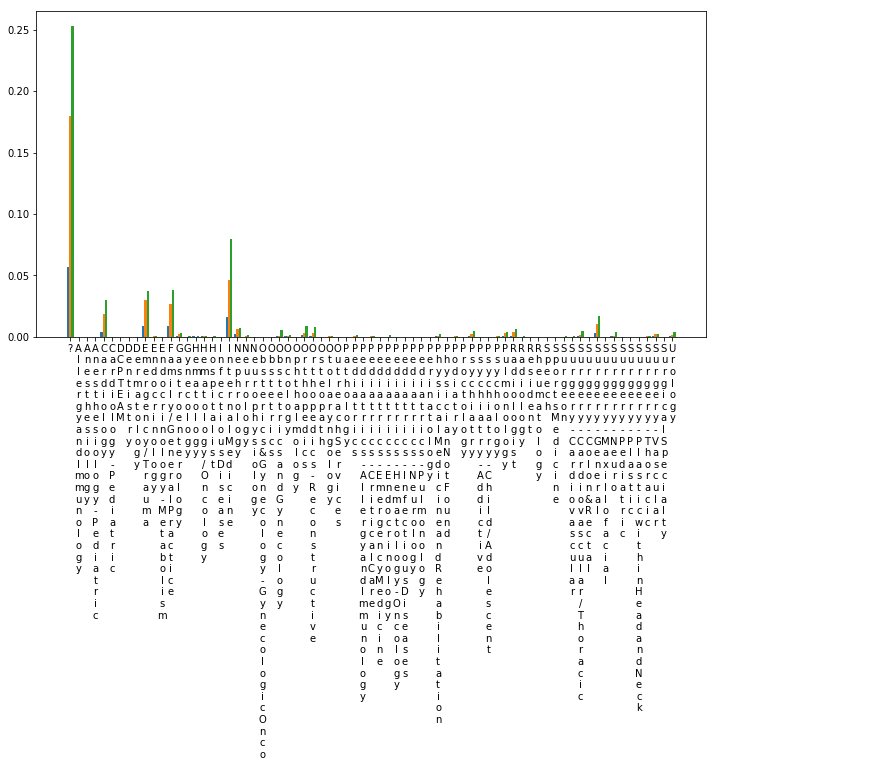

In [100]:
dxp.aggplot(agg='medical_specialty', data=patient_data_df[(patient_data_df['race']!='?') & (patient_data_df['gender']!='Unknown/Invalid')], hue='readmitted', normalize='all')

In [15]:
import numpy as np

In [58]:
patient_data_df_01 = patient_data_df.copy()
patient_data_df_clean = patient_data_df_01.replace('?',np.NaN)
patient_data_missing_values = nan_replace.isnull().sum()
patient_data_missing_values

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [59]:
type(patient_data_df_clean)

pandas.core.frame.DataFrame

In [60]:
patient_data_df_clean.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [61]:
patient_data_df_clean[patient_data_df_clean['weight'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]

96.85847925633315

In [62]:
patient_data_df_clean[patient_data_df_clean['medical_specialty'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]

49.08220820313268

In [63]:
patient_data_df_clean[patient_data_df_clean['race'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]

2.2335554114340743

In [66]:
patient_data_df_clean[patient_data_df_clean['payer_code'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]

39.5574160328597

In [68]:
patient_data_df_clean[patient_data_df_clean['diag_1'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]

0.020635575732562937

In [69]:
patient_data_df_clean[patient_data_df_clean['diag_2'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]

0.3517874339170253

In [70]:

patient_data_df_clean[patient_data_df_clean['diag_3'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]

1.398305917497003